In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [107]:
# get feature names and categories from adult.names
with open('data/adult.names', 'rb') as f:
    text = f.read().decode('utf-8')

features = text.split('\n\n')[-1] # last section
features = [feature.split(':') for feature in features.split('\n')[:-1]] # split into name and categories
features = {name: options.split(', ') for name, options in features}
for feature in features.keys():
    for category in range(len(features[feature])):
        features[feature][category] = features[feature][category].strip().replace('.', '')

# add target feature
features['target'] = ['>50K', '<=50K']

print(features)

{'age': ['continuous'], 'workclass': ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'], 'fnlwgt': ['continuous'], 'education': ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'], 'education-num': ['continuous'], 'marital-status': ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'], 'occupation': ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'], 'relationship': ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'], 'race': ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'], 'se

In [108]:
def getData(file: str, features: dict=features) -> pd.DataFrame:
    """Reads Adult dataset from file and returns a pandas DataFrame"""
    df = pd.read_csv(file, header=None, names=list(features.keys()), index_col=False)
    if df.isna().sum(axis=1).iloc[0] > 3:
        df = pd.read_csv(file, header=None, names=list(features.keys()), index_col=False, skiprows=1)

    # convert columns to correct dtypes using categories
    for feature in features.keys(): # iterate over features
        if features[feature][0] != 'continuous': # only categorical
            df[feature] = df[feature].apply(lambda x: x.replace('.', '').strip()) # strip whitespace from categorical features
            df[feature] = df[feature].astype(CategoricalDtype(categories=features[feature])) # convert to categorical dtype using categories

    return df

In [109]:
adultTrain = getData('data/adult.data', features)
adultTest = getData('data/adult.test', features)
print('Train shape:', adultTrain.shape)
display(adultTrain.head())
print('Test shape:', adultTest.shape)
display(adultTest.head())

Train shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Test shape: (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [112]:
adultTrain['set'] = 'train'
adultTest['set'] = 'test'

combined = pd.concat([adultTrain, adultTest])
combined.to_parquet('data/formatted_data.parquet')

# EDA

In [6]:
df = pd.read_parquet('data/formatted_data.parquet')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,set
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,train
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,train
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,train
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,train
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,test
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K,test
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,test
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,test


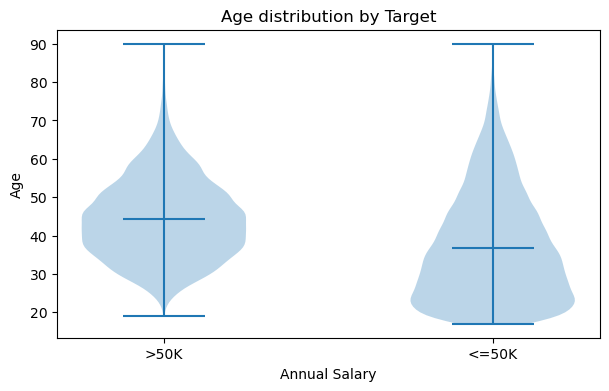

In [71]:
# make a violin plot where the x axis is the target and the y axis is the age
plt.figure(figsize=(7, 4))
plt.title('Age distribution by Target')
plt.xlabel('Annual Salary')
plt.ylabel('Age')
plt.violinplot([df[df['target'] == '>50K']['age'], df[df['target'] == '<=50K']['age']], showmeans=True)
plt.xticks([1, 2], ['>50K', '<=50K'])
plt.savefig('new_figures/age_violin.png', dpi=300)
plt.show()

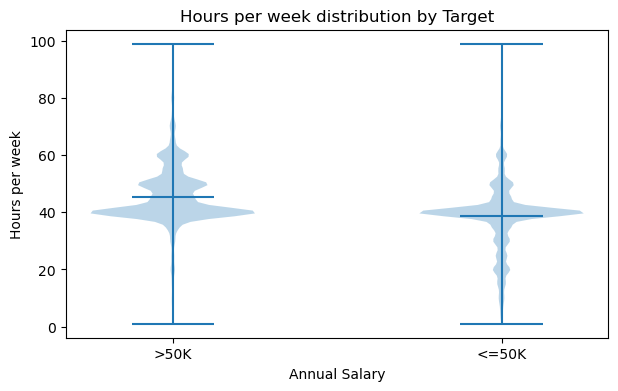

In [72]:
# Now by hours per week
plt.figure(figsize=(7, 4))
plt.title('Hours per week distribution by Target')
plt.xlabel('Annual Salary')
plt.ylabel('Hours per week')
plt.violinplot([df[df['target'] == '>50K']['hours-per-week'], df[df['target'] == '<=50K']['hours-per-week']], showmeans=True)
plt.xticks([1, 2], ['>50K', '<=50K'])
plt.savefig('new_figures/hours_violin.png', dpi=300)
plt.show()

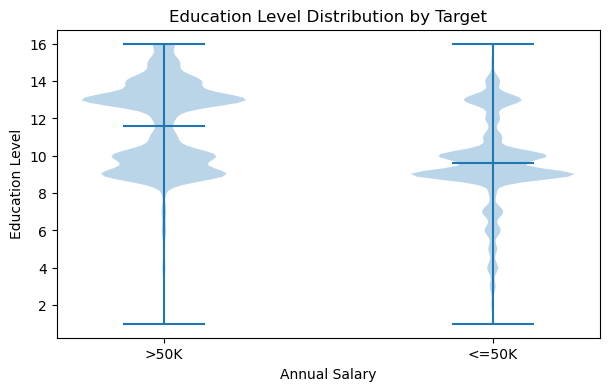

In [73]:
# education num
plt.figure(figsize=(7, 4))
plt.title('Education Level Distribution by Target')
plt.xlabel('Annual Salary')
plt.ylabel('Education Level')
plt.violinplot([df[df['target'] == '>50K']['education-num'], df[df['target'] == '<=50K']['education-num']], showmeans=True)
plt.xticks([1, 2], ['>50K', '<=50K'])
plt.savefig('new_figures/education_violin.png', dpi=300)
plt.show()

In [41]:
# fltten column multiindex
counts.columns = ['>50K', '<=50K']

In [52]:
counts = counts.transpose()

In [54]:
counts.columns = list(counts.columns)

In [ ]:
# how categrical distributino with respect to the target using heat maps

# get the categorical features
categorical = [feature for feature in df.columns if df[feature].dtype.name == 'category']

# make a heat map for each categorical feature
for feature in categorical:
    if feature != 'target':
        # get the counts of each category
        counts = df.groupby([feature, 'target']).size().unstack()
        # normalize the counts
        counts = counts.div(counts.sum(axis=1), axis=0)
        # plot the heatmap
        plt.figure(figsize=(20, 10))
        # plt.title(f'{feature} Distribution by Target')
        plt.xlabel('Annual Salary')
        plt.ylabel(feature.capitalize())
        plt.imshow(counts, cmap='Blues')
        plt.xticks([0, 1], ['>50K', '<=50K'])
        plt.yticks(np.arange(len(counts.index)), counts.index)
        plt.colorbar()
        if feature in ['education', 'occupation', 'relationship']:
            plt.savefig(f'new_figures/{feature}_heatmap.png', dpi=300)
        plt.show()

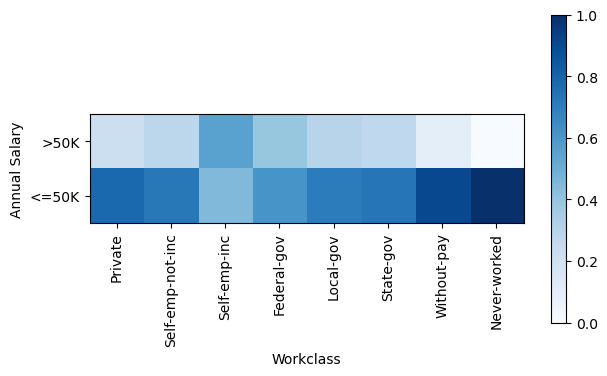

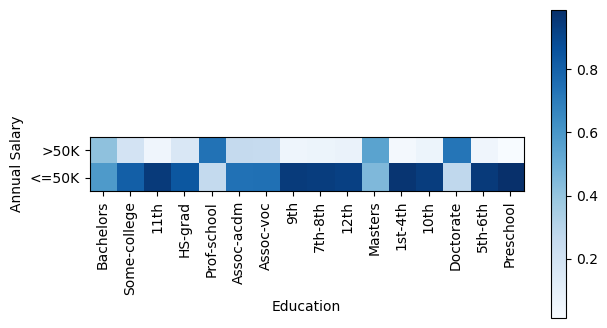

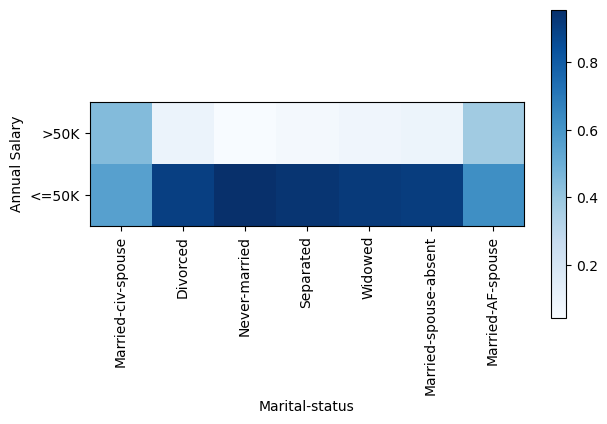

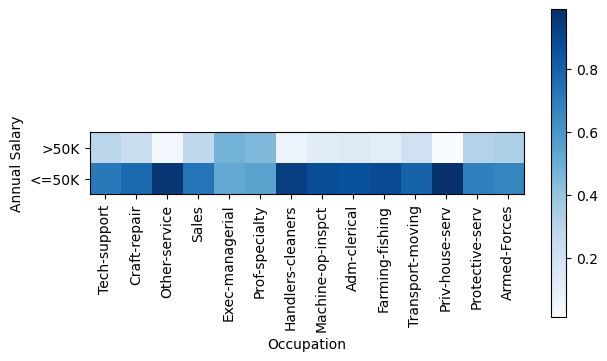

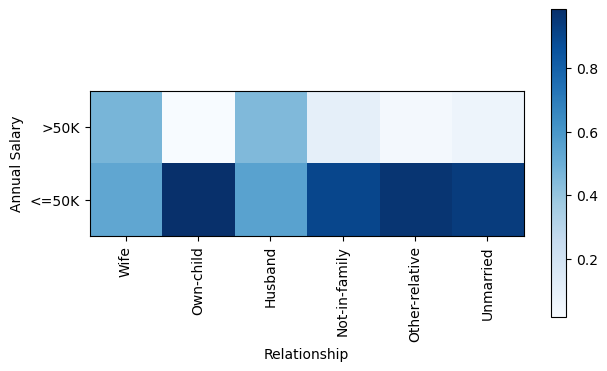

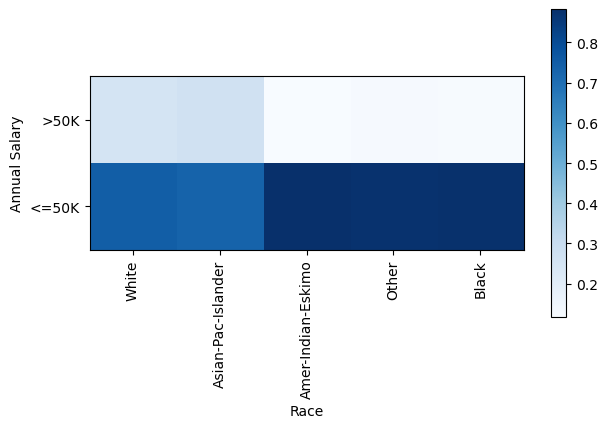

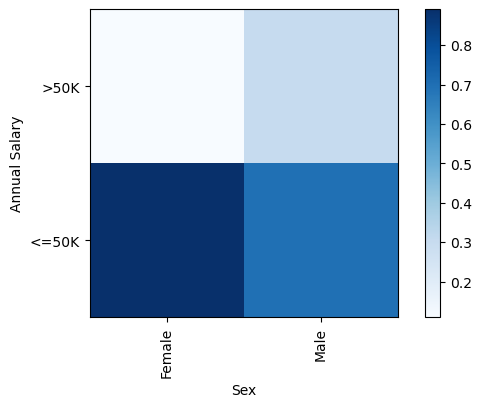

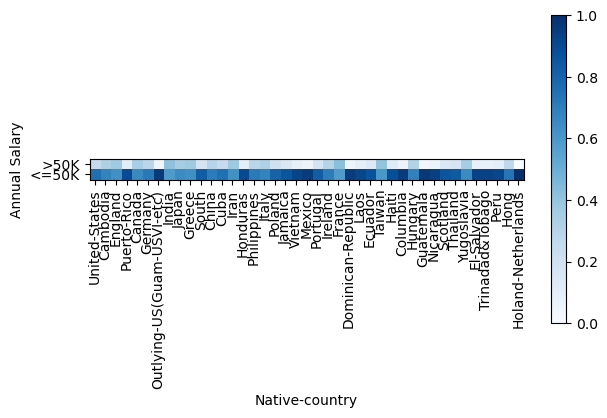

In [74]:
# Now the same but transposed to be more readable

# get the categorical features
categorical = [feature for feature in df.columns if df[feature].dtype.name == 'category']

# make a heat map for each categorical feature
for feature in categorical:
    if feature != 'target':
        # get the counts of each category
        counts = df.groupby([feature, 'target']).size().unstack()
        # normalize the counts
        counts = counts.div(counts.sum(axis=1), axis=0)
        # plot the heatmap
        plt.figure(figsize=(7, 4))
        # plt.title(f'{feature} Distribution by Target')
        plt.ylabel('Annual Salary')
        plt.xlabel(feature.capitalize())
        plt.imshow(counts.transpose(), cmap='Blues')
        plt.xticks(np.arange(len(counts.index)), counts.index, rotation=90)
        plt.yticks([0, 1], ['>50K', '<=50K'])
        plt.colorbar()
        if feature in ['education', 'occupation', 'relationship', 'marital-status']:
            plt.savefig(f'new_figures/{feature}_heatmap_transposed.png', dpi=300, bbox_inches='tight')
        plt.show()

In [66]:
# select numerical
numerical = [feature for feature in df.columns if df[feature].dtype.name != 'category']
df[numerical]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,set
0,39,77516,13,2174,0,40,train
1,50,83311,13,0,0,13,train
2,38,215646,9,0,0,40,train
3,53,234721,7,0,0,40,train
4,28,338409,13,0,0,40,train
...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,test
16277,64,321403,9,0,0,40,test
16278,38,374983,13,0,0,50,test
16279,44,83891,13,5455,0,40,test
